In [8]:
import numpy as np
import pandas as pd

%matplotlib inline

In [9]:
#Testing potential models

In [10]:
vader_df = pd.read_csv("../Notebooks/Data/Cleaned_Data/news_sentiment.csv", index_col="date", infer_datetime_format=True, parse_dates=True)
vader_df.head()

,Unnamed: 0,ticker,pos,neg,neu,compound
date,,,,,,
2022-05-06,0,ABNB,0.000000,0.000,1.000000,0.000000
2022-05-11,1,ABNB,0.075167,0.026,0.898667,0.199033
2022-05-12,2,ABNB,0.210000,0.159,0.631000,0.491200
2022-05-14,3,ABNB,0.169000,0.000,0.831000,0.709950
2022-05-16,4,ABNB,0.000000,0.000,1.000000,0.000000


In [11]:
vader_df = vader_df.drop(columns='Unnamed: 0')

In [12]:
closes = pd.read_csv("../Notebooks/Data/Cleaned_Data/stock_data.csv", index_col="date", infer_datetime_format=True, parse_dates=True)
closes.head()

,ticker,close,volume
date,,,
2015-12-01,NFLX,125.37,12550755
2015-12-02,NFLX,128.93,24105712
2015-12-03,NFLX,126.81,26644540
2015-12-04,NFLX,130.93,20250411
2015-12-07,NFLX,125.36,23351531


In [13]:
closes.sort_index()
closes.tail()

,ticker,close,volume
date,,,
2022-05-25,SOFI,7.01,35468235
2022-05-26,SOFI,7.14,35042166
2022-05-27,SOFI,7.55,38222764
2022-05-31,SOFI,7.48,61194845
2022-06-01,SOFI,7.05,36626131


In [14]:
#Scratch this
vader_df.to_csv('test.csv')

In [15]:
closes = closes.drop(columns='volume')
closes.head()

,ticker,close
date,,
2015-12-01,NFLX,125.37
2015-12-02,NFLX,128.93
2015-12-03,NFLX,126.81
2015-12-04,NFLX,130.93
2015-12-07,NFLX,125.36


In [16]:
closes_pivot = closes.pivot_table('close', ['date'], 'ticker')
closes_pivot

ticker,ABNB,BLK,DVN,FANG,FB,MCHP,MELI,MRO,MTRX,NFLX,PYPL,REGI,SOFI,SPWR,UBER
date,,,,,,,,,,,,,,,
2015-12-01,NaN,361.73,46.49,78.20,107.12,48.49,125.56,17.63,22.94,125.37,35.17,8.88,NaN,25.11,NaN
2015-12-02,NaN,358.92,43.53,76.79,106.07,46.66,124.52,16.67,22.47,128.93,35.15,8.73,NaN,26.17,NaN
2015-12-03,NaN,352.00,41.10,76.75,104.38,46.43,120.65,16.55,22.91,126.81,34.23,8.72,NaN,27.13,NaN
2015-12-04,NaN,360.76,40.53,76.31,106.18,47.37,121.78,16.12,22.11,130.93,35.62,8.89,NaN,26.68,NaN
2015-12-07,NaN,355.47,36.44,73.85,105.61,46.68,119.80,14.78,21.21,125.36,35.16,8.34,NaN,26.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,110.40,626.60,71.94,141.75,183.83,68.06,723.00,29.01,5.79,187.83,80.12,61.30,7.01,16.46,22.04
2022-05-26,114.30,652.44,73.81,146.43,191.63,70.06,783.44,29.75,5.84,191.40,80.42,61.37,7.14,17.03,23.10
2022-05-27,120.50,666.53,75.80,152.66,195.13,72.79,811.44,31.07,6.11,195.19,85.21,61.33,7.55,18.19,23.67


In [17]:
closes_df = pd.DataFrame(closes_pivot)
closes_df

ticker,ABNB,BLK,DVN,FANG,FB,MCHP,MELI,MRO,MTRX,NFLX,PYPL,REGI,SOFI,SPWR,UBER
date,,,,,,,,,,,,,,,
2015-12-01,NaN,361.73,46.49,78.20,107.12,48.49,125.56,17.63,22.94,125.37,35.17,8.88,NaN,25.11,NaN
2015-12-02,NaN,358.92,43.53,76.79,106.07,46.66,124.52,16.67,22.47,128.93,35.15,8.73,NaN,26.17,NaN
2015-12-03,NaN,352.00,41.10,76.75,104.38,46.43,120.65,16.55,22.91,126.81,34.23,8.72,NaN,27.13,NaN
2015-12-04,NaN,360.76,40.53,76.31,106.18,47.37,121.78,16.12,22.11,130.93,35.62,8.89,NaN,26.68,NaN
2015-12-07,NaN,355.47,36.44,73.85,105.61,46.68,119.80,14.78,21.21,125.36,35.16,8.34,NaN,26.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,110.40,626.60,71.94,141.75,183.83,68.06,723.00,29.01,5.79,187.83,80.12,61.30,7.01,16.46,22.04
2022-05-26,114.30,652.44,73.81,146.43,191.63,70.06,783.44,29.75,5.84,191.40,80.42,61.37,7.14,17.03,23.10
2022-05-27,120.50,666.53,75.80,152.66,195.13,72.79,811.44,31.07,6.11,195.19,85.21,61.33,7.55,18.19,23.67


In [18]:
#Fill missing values with previous
closes_df = closes_df.fillna(method='pad')
closes_df

ticker,ABNB,BLK,DVN,FANG,FB,MCHP,MELI,MRO,MTRX,NFLX,PYPL,REGI,SOFI,SPWR,UBER
date,,,,,,,,,,,,,,,
2015-12-01,NaN,361.73,46.49,78.20,107.12,48.49,125.56,17.63,22.94,125.37,35.17,8.88,NaN,25.11,NaN
2015-12-02,NaN,358.92,43.53,76.79,106.07,46.66,124.52,16.67,22.47,128.93,35.15,8.73,NaN,26.17,NaN
2015-12-03,NaN,352.00,41.10,76.75,104.38,46.43,120.65,16.55,22.91,126.81,34.23,8.72,NaN,27.13,NaN
2015-12-04,NaN,360.76,40.53,76.31,106.18,47.37,121.78,16.12,22.11,130.93,35.62,8.89,NaN,26.68,NaN
2015-12-07,NaN,355.47,36.44,73.85,105.61,46.68,119.80,14.78,21.21,125.36,35.16,8.34,NaN,26.38,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,110.40,626.60,71.94,141.75,183.83,68.06,723.00,29.01,5.79,187.83,80.12,61.30,7.01,16.46,22.04
2022-05-26,114.30,652.44,73.81,146.43,191.63,70.06,783.44,29.75,5.84,191.40,80.42,61.37,7.14,17.03,23.10
2022-05-27,120.50,666.53,75.80,152.66,195.13,72.79,811.44,31.07,6.11,195.19,85.21,61.33,7.55,18.19,23.67


In [19]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [20]:
# Define the window size
window_size = 30

# Set the index of the feature and target columns
#This is for BLK
feature_column = 1
target_column = 1

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(closes_df, window_size, feature_column, target_column)

In [21]:
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [22]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [23]:
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [24]:
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [25]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [26]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [27]:
# Show the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 30)            3840      
                                                                 
 dropout (Dropout)           (None, 30, 30)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 30)            7320      
                                                                 
 dropout_1 (Dropout)         (None, 30, 30)            0         
                                                                 
 lstm_2 (LSTM)               (None, 30)                7320      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [28]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=90, verbose=1)

Epoch 1/10
13/13 [==============================] - 6s 32ms/step - loss: 0.0691
Epoch 2/10
13/13 [==============================] - 0s 28ms/step - loss: 0.0372
Epoch 3/10
13/13 [==============================] - 0s 32ms/step - loss: 0.0153
Epoch 4/10
13/13 [==============================] - 0s 28ms/step - loss: 0.0143
Epoch 5/10
13/13 [==============================] - 0s 30ms/step - loss: 0.0105
Epoch 6/10
13/13 [==============================] - 0s 31ms/step - loss: 0.0099
Epoch 7/10
13/13 [==============================] - 0s 34ms/step - loss: 0.0098
Epoch 8/10
13/13 [==============================] - 0s 30ms/step - loss: 0.0099
Epoch 9/10
13/13 [==============================] - 0s 28ms/step - loss: 0.0095
Epoch 10/10
13/13 [==============================] - 0s 33ms/step - loss: 0.0088


In [29]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.12464821338653564

In [30]:
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

16/16 [==============================] - 1s 7ms/step


In [31]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [32]:
# Create a DataFrame of Real and Predicted values
#This is for BLK
stocks = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = closes_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
stocks.head()

,Actual,Predicted
date,,
2020-07-02,551.77,541.122253
2020-07-06,557.55,540.890747
2020-07-07,549.23,540.783630
2020-07-08,557.61,540.761902
2020-07-09,549.44,540.896301


In [33]:
stocks

,Actual,Predicted
date,,
2020-07-02,551.77,541.122253
2020-07-06,557.55,540.890747
2020-07-07,549.23,540.783630
2020-07-08,557.61,540.761902
2020-07-09,549.44,540.896301
...,...,...
2022-05-25,626.60,594.112793
2022-05-26,652.44,592.818665
2022-05-27,666.53,592.275818


<AxesSubplot:title={'center':'Actual Vs. Predicted BLK Prices'}, xlabel='date'>

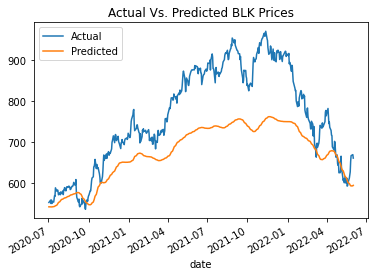

In [34]:
# Plot the real vs predicted prices as a line chart
stocks.plot(title="Actual Vs. Predicted BLK Prices")